In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [3]:
target_distribution = np.array( [1,2,4,8,16,32,64,128] ) # frequencies for x values #
target_distribution = 1 / target_distribution

target_distribution_x = np.arange(1,len(target_distribution) + 1) # simulated x values #

target_distribution = target_distribution / target_distribution.sum()

target_distribution

array([0.50196078, 0.25098039, 0.1254902 , 0.0627451 , 0.03137255,
       0.01568627, 0.00784314, 0.00392157])

In [4]:
def metropolis():
    
    def adjecent(current_x,offset):
        return (current_x + offset) % len(target_distribution)
    
    iterations = 100000
    
    current_x = np.random.randint(0,len(target_distribution))
    
    accepted_x = np.zeros(iterations)
    
    for i in range(iterations):
                
            direction = np.random.choice([-1,1])
            
            current_p = target_distribution[current_x]
            
            proposed_x = adjecent(current_x,direction)
            proposed_p = target_distribution[proposed_x]
            
            move_p = proposed_p / current_p
            
            if move_p > 1 :
                accepted_x[i] = proposed_x
                current_x = proposed_x
                
            else:
                rnd = np.random.uniform(0,1)
                
                if rnd <= move_p:
                    accepted_x[i] = proposed_x
                    current_x = proposed_x
                    
                else:
                    accepted_x[i] = current_x
        
    return accepted_x[int(len(accepted_x) / 2) :] # burn the first half
    

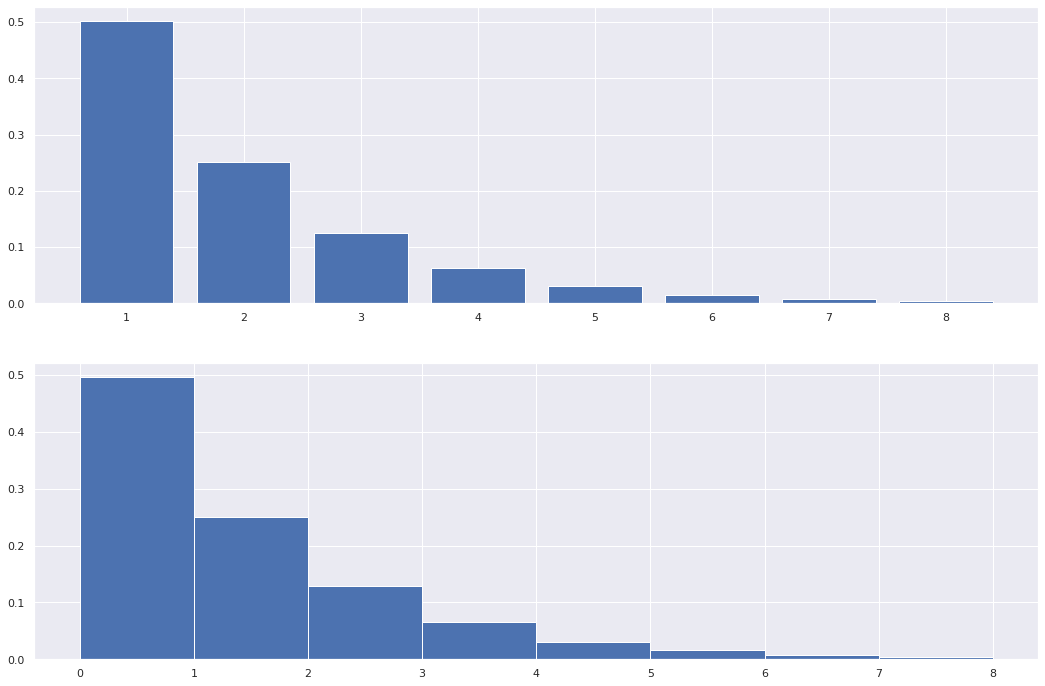

In [5]:
inferred_distribution = metropolis()

fig,axes = plt.subplots(2,figsize=(18,12))
axes[0].bar(target_distribution_x,target_distribution)
_= axes[1].hist(inferred_distribution,density=True,bins=range(len(target_distribution) + 1))


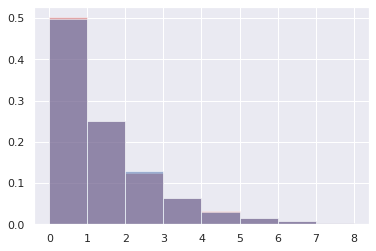

In [6]:
plt.bar(target_distribution_x,target_distribution,alpha=0.5,color='r',width=-1,align='edge')
_= plt.hist(inferred_distribution,density=True,bins=range(len(target_distribution) + 1),alpha=0.5)

In [7]:
freq = np.histogram(inferred_distribution,bins=range(len(target_distribution) + 1))
rel_freq = freq[0] / sum(freq[0])

rel_freq

array([0.49686, 0.25056, 0.12962, 0.06488, 0.03088, 0.01568, 0.00778,
       0.00374])

In [8]:
distributions = pd.DataFrame({'target_distribution' : target_distribution,
                             'inferred_distribution' : rel_freq})


distributions

,target_distribution,inferred_distribution
0,0.501961,0.49686
1,0.250980,0.25056
2,0.125490,0.12962
3,0.062745,0.06488
4,0.031373,0.03088
5,0.015686,0.01568
6,0.007843,0.00778
7,0.003922,0.00374


<AxesSubplot:>

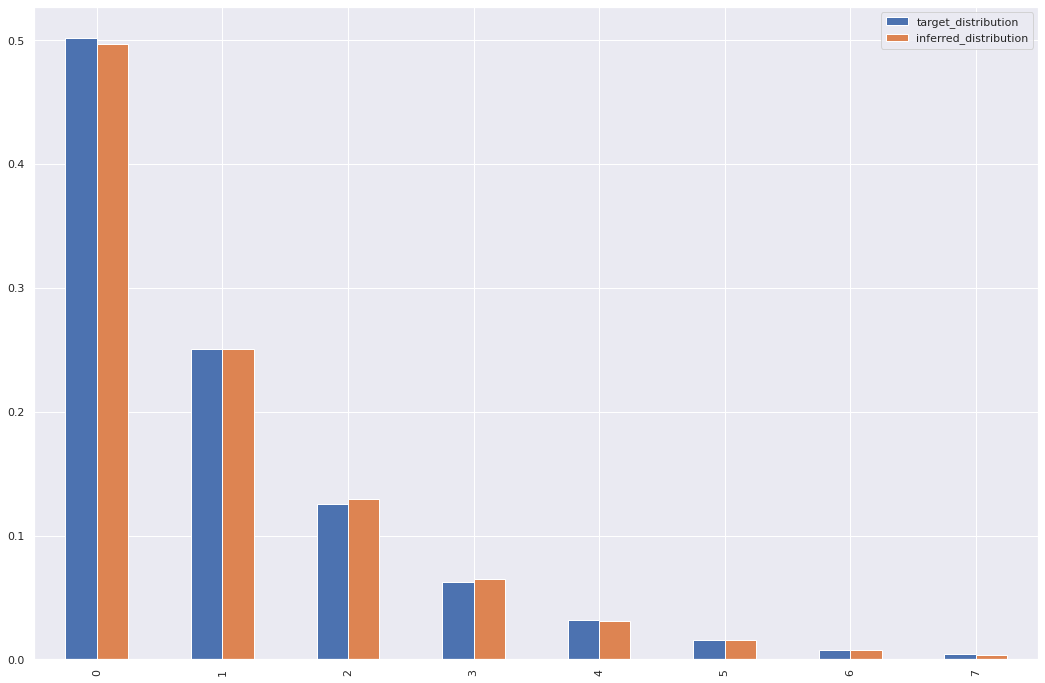

In [9]:
distributions.plot(kind='bar',figsize=(18,12))

<AxesSubplot:>

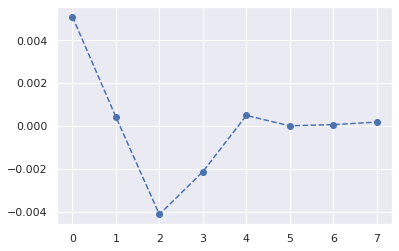

In [10]:
diff = distributions['target_distribution'] - distributions['inferred_distribution']
diff.plot(style='o--')

<AxesSubplot:>

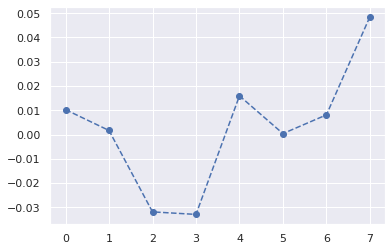

In [11]:
rel = distributions['target_distribution'] / distributions['inferred_distribution'] - 1
rel.plot(style='o--')

In [12]:
### test bayes rule ###
import scipy.stats as sps

x_prior = np.linspace(-8,8,100)
x_likelihood = np.linspace(-8,8,100)

#prior = sps.uniform.pdf(x_prior,0,1)
prior = sps.norm.pdf(x_prior,0,1)
prior /= prior.sum()

likelihood = sps.norm.pdf(x_likelihood,3,2)
likelihood /= likelihood.sum()


In [13]:
posterior = prior * likelihood
posterior /= posterior.sum()
posterior

array([6.06160224e-22, 3.38867144e-21, 1.83354635e-20, 9.60228800e-20,
       4.86718623e-19, 2.38782009e-18, 1.13382400e-17, 5.21086819e-17,
       2.31790128e-16, 9.97930241e-16, 4.15839591e-15, 1.67714994e-14,
       6.54693979e-14, 2.47357570e-13, 9.04549772e-13, 3.20154885e-12,
       1.09675141e-11, 3.63644204e-11, 1.16698572e-10, 3.62472295e-10,
       1.08969384e-09, 3.17069579e-09, 8.92945717e-09, 2.43397405e-08,
       6.42136316e-08, 1.63967933e-07, 4.05238795e-07, 9.69356466e-07,
       2.24427675e-06, 5.02909351e-06, 1.09074546e-05, 2.28969439e-05,
       4.65213201e-05, 9.14843782e-05, 1.74125451e-04, 3.20773122e-04,
       5.71944766e-04, 9.87030589e-04, 1.64864647e-03, 2.66529241e-03,
       4.17044687e-03, 6.31597969e-03, 9.25804440e-03, 1.31346407e-02,
       1.80358883e-02, 2.39705103e-02, 3.08345365e-02, 3.83899876e-02,
       4.62614160e-02, 5.39560657e-02, 6.09090786e-02, 6.65494067e-02,
       7.03763516e-02, 7.20327030e-02, 7.13597102e-02, 6.84221703e-02,
      

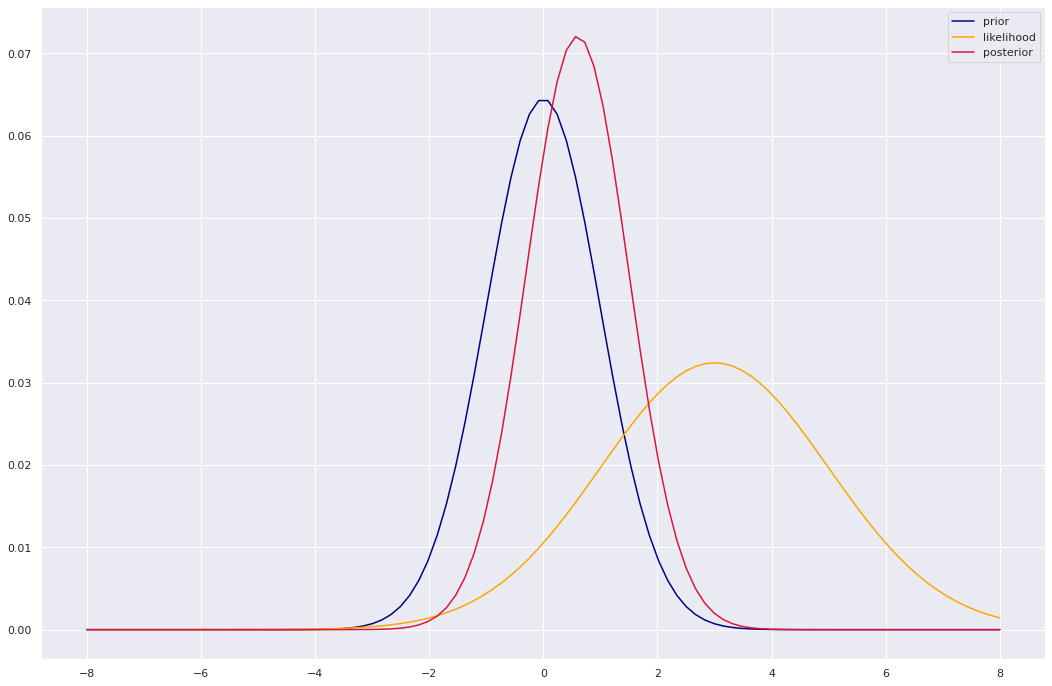

In [14]:
fig,ax = plt.subplots(figsize=(18,12))
ax.plot(x_likelihood,prior,color='navy',label='prior')
ax.plot(x_likelihood,likelihood,color='orange',label='likelihood')
ax.plot(x_likelihood,posterior,color='crimson',label='posterior')

plt.legend()

In [23]:
### water - land example from McElreath ###
p = np.arange(0,1,0.05)
likelihood = sps.binom.pmf(6,9,p)
likelihood

array([0.00000000e+00, 1.12530469e-06, 6.12360000e-05, 5.87602477e-04,
       2.75251200e-03, 8.65173340e-03, 2.10039480e-02, 4.24060306e-02,
       7.43178240e-02, 1.16049276e-01, 1.64062500e-01, 2.11881464e-01,
       2.50822656e-01, 2.71621135e-01, 2.66827932e-01, 2.33596802e-01,
       1.76160768e-01, 1.06921888e-01, 4.46410440e-02, 7.71846485e-03])

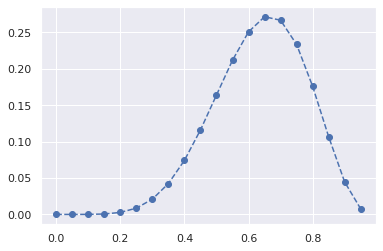

In [24]:
plt.plot(p,likelihood,'o--')